In [117]:
import pandas as pd
import numpy as np

In [65]:
df1 = pd.read_csv("test.csv")
df = pd.read_csv("train.csv")

In [64]:
df = pd.concat([df1, df2])

In [66]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [67]:
df = df.drop(['Name'], axis=1)

In [68]:
df = df.drop(['PassengerId'], axis=1)

In [69]:
df = df.drop(['Cabin'], axis=1)

In [70]:
df = df.drop(['Ticket'], axis=1)

In [71]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [72]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [73]:
df['Fare'] = df['Fare'].fillna(df.Fare.median())

In [74]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [75]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [76]:
df.duplicated().sum()

np.int64(116)

In [77]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
x = df['Sex'].unique()
y = df['Survived']

In [124]:
gender = df.groupby(['Sex', 'Survived']).size().unstack()

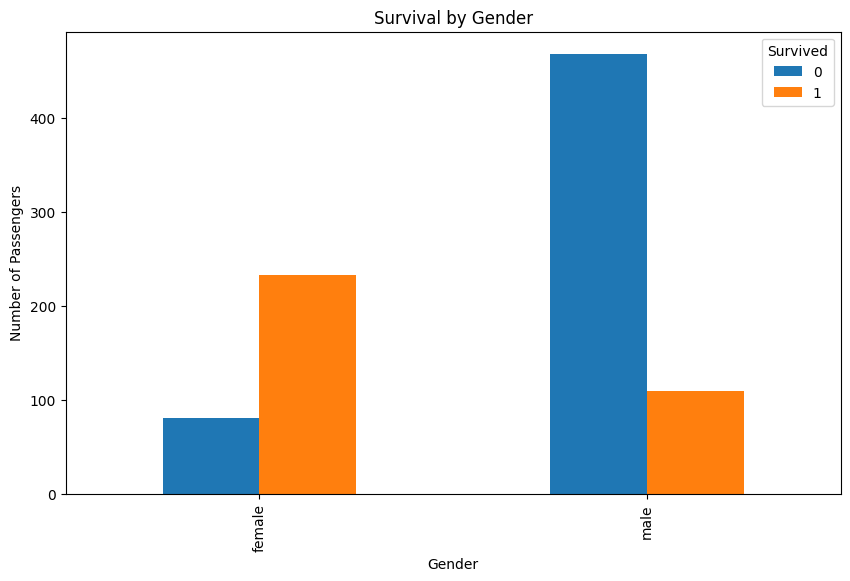

In [113]:
gender.plot(kind='bar', figsize=(10, 6))
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.show()

In [116]:
df.to_csv("Cleaned_Titanic_Data.csv", index=False)

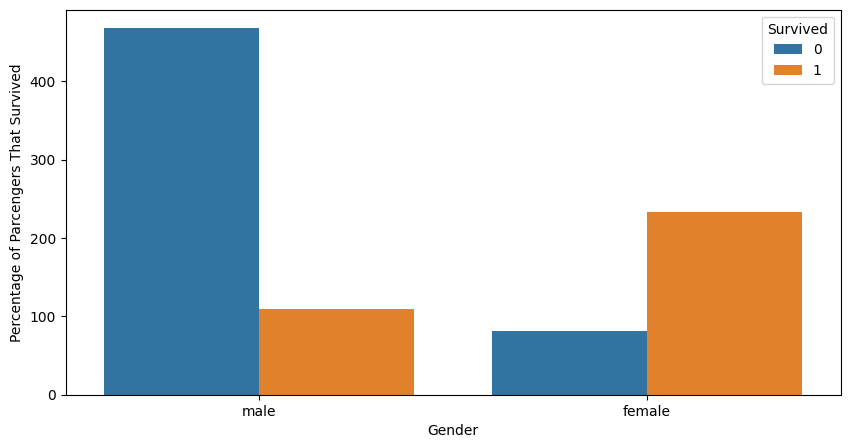

In [121]:
plt.figure(figsize=(10,5))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.xlabel('Gender')
plt.ylabel('Percentage of Parcengers That Survived')
plt.show()

In [129]:
survival_percentage = gender.div(gender.sum()*100)

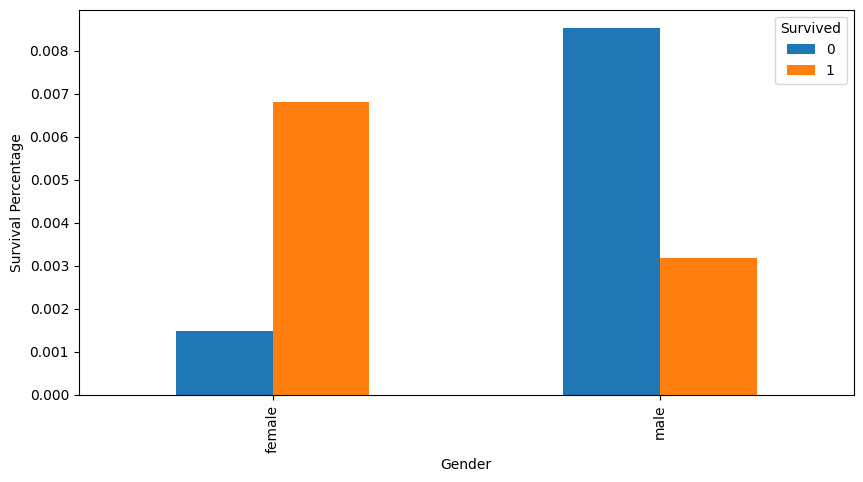

In [139]:
survival_percentage.plot(kind='bar', figsize=(10,5))
plt.xlabel('Gender')
plt.ylabel('Survival Percentage')
plt.show()

In [140]:
survival_percentage

Survived,0,1
Sex,,
female,0.001475,0.006813
male,0.008525,0.003187


In [145]:
male = df[df.Sex == 'male']
sur = df[df.Survived == 1]

In [146]:
sur

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C
...,...,...,...,...,...,...,...,...
875,1,3,female,15.0,0,0,7.2250,C
879,1,1,female,56.0,0,1,83.1583,C
880,1,2,female,25.0,0,1,26.0000,S
887,1,1,female,19.0,0,0,30.0000,S


In [153]:
sur_male = sur[sur.Sex == 'male']

In [160]:
sur.count()

Survived    342
Pclass      342
Sex         342
Age         342
SibSp       342
Parch       342
Fare        342
Embarked    342
dtype: int64

In [161]:
sur_male.count()

Survived    109
Pclass      109
Sex         109
Age         109
SibSp       109
Parch       109
Fare        109
Embarked    109
dtype: int64

In [170]:
a = (109/342)*100
b = (233/342)*100

In [173]:
x = round(a, 2)

In [174]:
y = round(b, 2)

In [175]:
x+y

100.0

In [181]:
o = df['Age'].median()

np.float64(28.0)

In [178]:
n = df['Age'].mean()

In [179]:
round(n, 2)

np.float64(29.36)

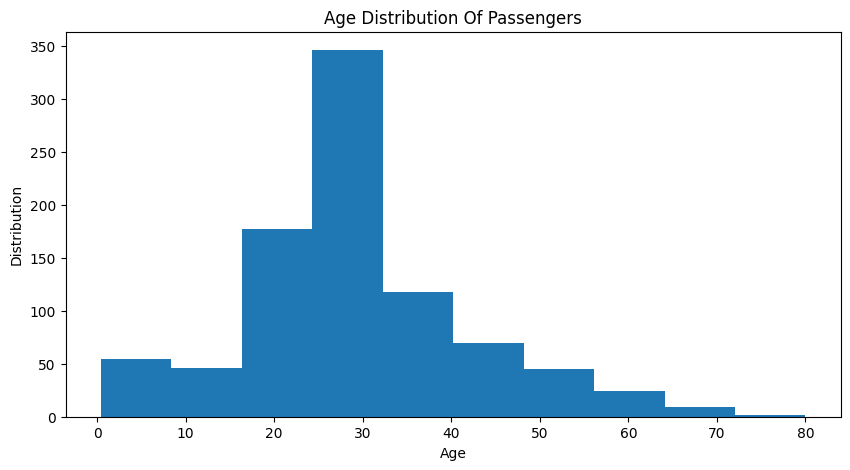

In [193]:
plt.figure(figsize=(10,5))
plt.hist(x='Age', data=df)
plt.xlabel("Age")
plt.ylabel("Distribution")
plt.title("Age Distribution Of Passengers")
plt.show()

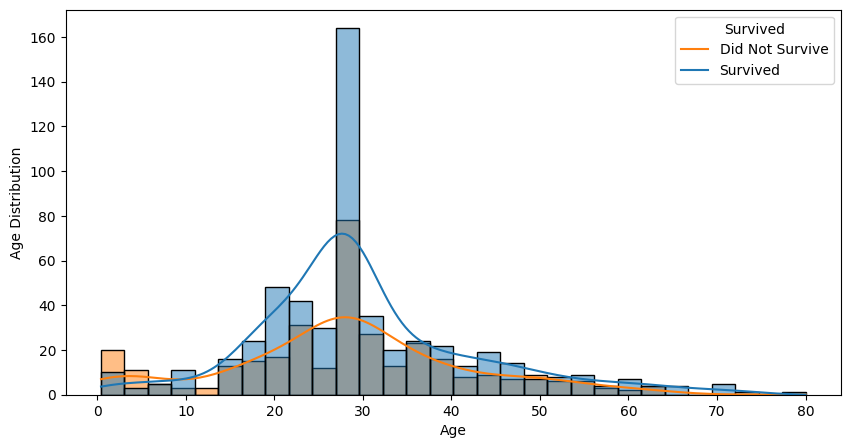

In [203]:
plt.figure(figsize=(10,5))
sns.histplot(x=df['Age'], hue=df['Survived'], kde=True)
plt.xlabel("Age")
plt.ylabel("Age Distribution")
plt.legend(title='Survived', labels=['Did Not Survive', 'Survived'])
plt.show()